In [1]:
import pandas as pd  # for easily manipulating databases
import numpy as np  # for numerical computations
import matplotlib.pyplot as plt  # for plotting

# Lab: Trees - Solutions

In this lab, we will revisit the Diabetes dataset from Week 2, on which we fit several linear models (OLS, ridge regression, Lasso) and saw no significant difference between the performance of the three. 

## Revisiting the Diabetes Dataset

Recall from Week 2 lab the diabetes dataset, which contains 11 measurements from a cohort of N = 442 patients with diabetes, and we are most interested in the column labeled “Y”, which is some clinical measure of disease progression taken one year after the rest of the measurements are taken.

So we will want to predict Y from the 10 other variables, which are the predictors.

In [7]:
df = pd.read_csv('./diabetes.csv')
print(df)
print(df.columns) # to see the variable names

     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 11 columns]
Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')


## Processing the data

We perform the same data processing as before. 'Y' is the target variable. Extract it from the dataframe and create a separate matrix of predictors where any discrete variables are encoded appropriately.

The code from that lab is as follows.

In [8]:
Y = df['Y']

# Encode the sex variable
# if you are new to python, you can use a loop
n = df.shape[0]  # the number of measurements
sex = np.zeros(n)  # creates a vector of zeros
for i in range(n):
    if df['SEX'].iloc[i] == 1:  # iloc means to index the dataframe by integer location, not by label. It's important. Google it to learn more.
        sex[i] = 1
    else:
        sex[i] = 0

# sex = (df['SEX'] == 1).astype(int)  # this is a faster way to encode the sex variable using vectorization

columns_i_want = ['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
X = df[columns_i_want]
# X = df[[key for key in df.columns if (key != 'SEX') and (key != 'Y')]]  # cleaner way to do the selection above

X['SEX=1'] = sex  # this is how to add a new variable to a DataFrame

print(Y)  
print(X)  

0      151
1       75
2      141
3      206
4      135
      ... 
437    178
438    104
439    132
440    220
441     57
Name: Y, Length: 442, dtype: int64
     AGE   BMI      BP   S1     S2    S3    S4      S5   S6  SEX=1
0     59  32.1  101.00  157   93.2  38.0  4.00  4.8598   87    0.0
1     48  21.6   87.00  183  103.2  70.0  3.00  3.8918   69    1.0
2     72  30.5   93.00  156   93.6  41.0  4.00  4.6728   85    0.0
3     24  25.3   84.00  198  131.4  40.0  5.00  4.8903   89    1.0
4     50  23.0  101.00  192  125.4  52.0  4.00  4.2905   80    1.0
..   ...   ...     ...  ...    ...   ...   ...     ...  ...    ...
437   60  28.2  112.00  185  113.8  42.0  4.00  4.9836   93    0.0
438   47  24.9   75.00  225  166.0  42.0  5.00  4.4427  102    0.0
439   60  24.9   99.67  162  106.6  43.0  3.77  4.1271   95    0.0
440   36  30.0   95.00  201  125.2  42.0  4.79  5.1299   85    1.0
441   36  19.6   71.00  250  133.2  97.0  3.00  4.5951   92    1.0

[442 rows x 10 columns]


/var/folders/w6/877v3d_915s9lp7c8g8nw5r80000gn/T/ipykernel_44928/3455249584.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SEX=1'] = sex  # this is how to add a new variable to a DataFrame


# Comparison of Models

### Problem 1:

In that lab, we found that the linear models did not necessarily distinguish themselves from one another. What about trying tree-based (nonlinear) models? Implement the comparative experiment from that lab and now include decision trees, random forests, and boosting.

Now days, gradient boosting trees are the standard implementation of boosting trees, and so that is the scikit-learn implementation we will use here. Even though we did not specifically see how it is implemented, recall that 'gradient boosting' just refers to the way the boosting trees are fit, the model structure is the same and so you can interpret the results based on the framework you learned in class.

The necessary imports and usage methods (in the comments only) are given below. I have copy and pasted my experimental setup from my solutions to the Week 2 lab here, but I did not edit it further for this problem. You should make the necessary additions to the code. Also, you could just as well have used your own code if your setup was different.

Play around with different settings of the hyperparameters to try and get good performance. You can even refer to the documentation to see if there are other hyperparameters you want to tune. You could even try cross-validation of parameters (e.g., using techniques from the Week 3 lab) if you like.

### Problem 2:

When implementing random forests and gradient boosting trees, is it important to cross-validate over some of the hyperparameters? Which? If so, make sure you do it in the experiment.

### Solutions:

It isn't important to cross-validate/select the number of trees in a RF, but it is important in boosting. So you cross-validate 'n_estimators' for the GBT model. Moreover, the number of trees and the learning rate are tightly linked when considering performance, and so you would probably need to vary learning rate too. The code below uses scikit-learn's GridSearchCV to select over both of these parameters for the GBT model.

In [15]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import time

"""
lr = LinearRegression(fit_intercept=True).fit(X_train, Y_train)  # Linear regression with an intercept. Do NOT use X_ from statsmodels.
Y_pred = lr.predict(X_test)  # prediction on a test set

ridge = RidgeCV(alphas=np.linspace(0.001, 10.0, 100), fit_intercept=True, cv=10).fit(X_train, Y_train)  # Ridge regression with an intercept. Selects the penalty from among 100 linearly spaced values in (0.001, 100) using 10-fold cross validation.
Y_pred = ridge.predict(X_test)  # prediction on a test set

lasso = LassoCV(alphas=np.linspace(0.001, 10.0, 100), fit_intercept=True, cv=10).fit(X_train, Y_train)  # Lasso with an intercept. Selects the penalty from among 100 linearly spaced values in (0.001, 100) using 10-fold cross validation.
Y_pred = lasso.predict(X_test)  # prediction on a test set

dt = DecisionTreeRegressor().fit(X_train, Y_train)
Y_pred = dt.predict(X_test)

rf = RandomForestRegressor(n_estimators=200).fit(X_train, Y_train)  # n_estimators is the number of trees
Y_pred = rf.predict(X_test)

gbt = GradientBoostingRegressor(n_estimators=200).fit(X_train, Y_train)  # n_estimators is the number of trees
Y_pred = gbt.predict(X_test)

"""

# The following grid will be used to cross-validate over the GBT parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
}

scores = {
    'Naive': [], 
    'OLS': [], 
    'Ridge': [], 
    'Lasso': [], 
    'DT': [], 
    'RF': [], 
    'GBT': [],
}

importances_rf = []  # solutions: container for RF feature importances
importances_gbt = []  # solutions: container for RF feature importances

indices = list(range(len(df)))  # how we will index the dataset
n_train = int(len(df) * .85)  # each split will have 85% train and 15% test

n_cv = 20
for k in range(n_cv):
    
    t_start = time.time()
    
    np.random.shuffle(indices)  # shuffle the indices. this function works in-place
    train_inds = indices[:n_train]  # slice out the training indices
    test_inds = indices[n_train:]

    Y_train = Y.iloc[train_inds]  # it is very important to remember to use iloc if using integer index
    X_train = X.iloc[train_inds, :].copy()
    
    Y_test = Y.iloc[test_inds]
    X_test = X.iloc[test_inds, :].copy()
    
    # standardize the predictors (don't standardize the gender variable)
    for feature_name in ['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']:
        mean_ = X_train[feature_name].mean()
        std_ = X_train[feature_name].std()
        X_train[feature_name] = (X_train[feature_name] - mean_) / std_
        X_test[feature_name] = (X_test[feature_name] - mean_) / std_  # we must use the training statistics to transform the test set!
    
    # Now fit the models on the training set and predict the test targets
    Y_pred = np.mean(Y_train)  # this naive model doesn't even use the covariates: It is an intercept-only model
    rmse = np.sqrt(np.mean((Y_test - Y_pred) ** 2))  # Y_pred is a scalar here, numpy automatically "broadcasts" the operation to the entire array 
    scores['Naive'].append(rmse)
    
    lr = LinearRegression(fit_intercept=True).fit(X_train, Y_train)  # Linear regression with an intercept. Do NOT use X_ from statsmodels.
    Y_pred = lr.predict(X_test)  # prediction on a test set
    rmse = np.sqrt(np.mean((Y_test - Y_pred) ** 2))  # root mean squared error is more interpretable than MSE
    scores['OLS'].append(rmse)

    ridge = RidgeCV(alphas=np.linspace(0.001, 100.0, 100), fit_intercept=True, cv=10).fit(X_train, Y_train)  # Ridge regression with an intercept. Selects the penalty from among 0.1, 1.0, and 10 using 5-fold cross validation.
    Y_pred = ridge.predict(X_test) 
    rmse = np.sqrt(np.mean((Y_test - Y_pred) ** 2))
    scores['Ridge'].append(rmse)

    lasso = LassoCV(alphas=np.linspace(0.001, 100.0, 100), fit_intercept=True, cv=10).fit(X_train, Y_train)  # Lasso with an intercept. Selects the penalty from among 0.1, 1.0, and 10 using 5-fold cross validation.
    Y_pred = lasso.predict(X_test)
    rmse = np.sqrt(np.mean((Y_test - Y_pred) ** 2))
    scores['Lasso'].append(rmse)

    # fit a decision tree
    dt = DecisionTreeRegressor().fit(X_train, Y_train)
    Y_pred = dt.predict(X_test)
    rmse = np.sqrt(np.mean((Y_test - Y_pred) ** 2))
    scores['DT'].append(rmse)

    # fit a random forest
    rf = RandomForestRegressor(n_estimators=200).fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    rmse = np.sqrt(np.mean((Y_test - Y_pred) ** 2))
    scores['RF'].append(rmse)

    # store the feature importances for Problem 3
    rf_s = pd.Series(rf.feature_importances_, index=rf.feature_names_in_)  # solution
    importances_rf.append(rf_s)  # solution

    # fit a gradient boosting tree, you should cross-validate over the number of trees and learning rate
    grid = GridSearchCV(
        GradientBoostingRegressor(),
        param_grid,
        cv=5,
    )
    grid.fit(X_train, Y_train)
    gbt = grid.best_estimator_
    Y_pred = gbt.predict(X_test)
    rmse = np.sqrt(np.mean((Y_test - Y_pred) ** 2))
    scores['GBT'].append(rmse)

    # store the feature importances for Problem 3
    gbt_s = pd.Series(gbt.feature_importances_, index=gbt.feature_names_in_)  # solution
    importances_gbt.append(gbt_s)  # solution
    
    t_iter = time.time() - t_start
    print("Finished iteration %d in %.2f secs" % (k, t_iter))

Finished iteration 0 in 8.70 secs
Finished iteration 1 in 8.75 secs
Finished iteration 2 in 8.59 secs
Finished iteration 3 in 8.70 secs
Finished iteration 4 in 9.03 secs
Finished iteration 5 in 8.74 secs
Finished iteration 6 in 8.93 secs
Finished iteration 7 in 8.61 secs
Finished iteration 8 in 8.64 secs
Finished iteration 9 in 8.88 secs
Finished iteration 10 in 8.64 secs
Finished iteration 11 in 8.66 secs
Finished iteration 12 in 8.65 secs
Finished iteration 13 in 8.63 secs
Finished iteration 14 in 8.93 secs
Finished iteration 15 in 8.94 secs
Finished iteration 16 in 8.64 secs
Finished iteration 17 in 8.68 secs
Finished iteration 18 in 8.67 secs
Finished iteration 19 in 8.89 secs


### Compare Results

Use boxplots and statistical tests to compare the models. I have copied my code from the solutions in Week 2 here. Adjust them to incorporate your new models and analyze your results.

Naive ave test error: 76.1043149016674
OLS ave test error: 53.41161620907129
Ridge ave test error: 53.41291754888027
Lasso ave test error: 53.53680980126991
DT ave test error: 81.0531788125557
RF ave test error: 57.37059225985447
GBT ave test error: 56.329488135673635


Text(0, 0.5, 'RMSE')

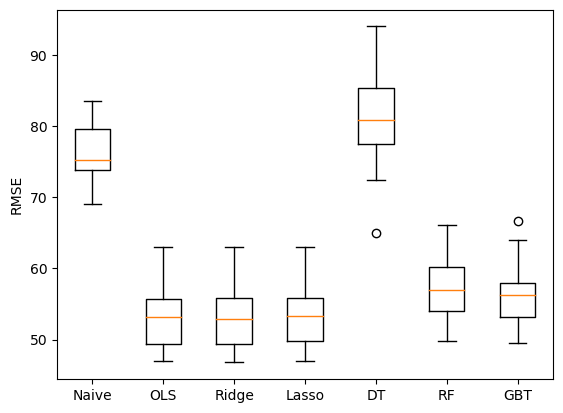

In [17]:
model_names = list(scores.keys())

for name in model_names:
    scores_ = scores[name]
    print("%s ave test error:" % name, np.mean(scores_))

plt.boxplot([scores[name] for name in model_names])
plt.xticks(list(range(1, len(model_names) + 1)), model_names)
plt.ylabel('RMSE')

In [18]:
# compare some of these with a t-test
from scipy.stats import ttest_rel
print("t-test p-values for RMSE scores:")
print(ttest_rel(scores['OLS'], scores['RF']).pvalue)
print(ttest_rel(scores['OLS'], scores['GBT']).pvalue)
print(ttest_rel(scores['RF'], scores['GBT']).pvalue)

t-test p-values for RMSE scores:
4.7912988811109095e-05
3.837555681009381e-05
0.019288208757213474


### Discussion of Results

The RF and GBT models underperform compared to the linear models! What's up with this?

In my experience, it is not common for RF/GBT models to _underperform_ compared to linear models. Usually, I would see cases where they perform comparably, in which case the conclusion would be that there is no evidence of complicated nonlinear relationships between the covariates. Statistical wisdom dictates that more complex models can overfit compared to less complex models if that additional complexity is not beneficial to the problem, even more so when the signal-to-noise ratio is low. The results above would suggest that the relationship is actually _best_ modeled as linear and that the complex nonlinear models are overfitting.

# Exploring Features

### Problem 3: Displaying decision trees

We know that decision trees are very interpretable and can be directly visualized. Display the last decision tree that was fit. Assuming you ran code like mine above and used the 'dt' variable name I suggested in the comments, the last fitted decision tree will be held in the variable 'dt' and you can plot it with the following helper function like so:

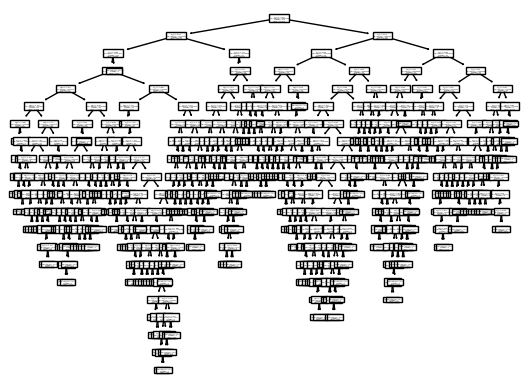

In [19]:
from sklearn.tree import plot_tree

plot_tree(dt)
plt.show()

### Problem 3:

This tree looks huge. Why?

### Solutions

Recall that when growing a random forest, each of the trees are left unpruned, so they are very deep. These deep trees have low bias but high variance; they likely overfit. But when aggregated, the random forest reduces the variance of the overall estimate.

## Exploring feature importances in ensembles

Feature importances are automatically computed and stored in the fitted regressor objects 'RandomForestRegressor' and 'GradientBoostingRegressor'. Again, assuming you ran code like mine above and used my suggested 'rf' variable name, you can plot them for the last train/test split like so:

<Axes: >

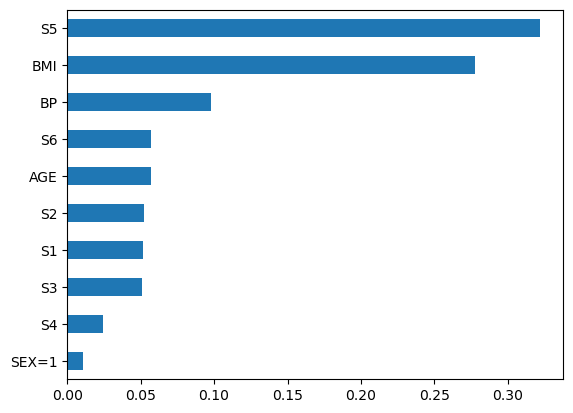

In [20]:
rf_feature_importances = rf.feature_importances_  # the relative feature importances
rf_feature_names = rf.feature_names_in_  # these are the corresponding feature names
rf_s = pd.Series(rf_feature_importances, index=rf_feature_names)  # make a series for convenience
rf_s = rf_s.sort_values()  # sort them for visualization
rf_s.plot(kind='barh')

### Problem 4:

You can make a similar plot for the last gradient boosting tree. These are just the feature importances for one of the train/test splits (the last one). Can you make a plot visualizing the variability/noise of these measures over all train/test splits?

Use code/techniques from the Week 3 lab (on generalized linear models) to plot some standard error bars. Note that the horizontal axis here is _relative_ feature importance weight (i.e., they are normalized against the maximum value).

### Solutions:

You could take some code from my Week 3 lab solutions when plotting the distributions over the coefficients in ridge regression/lasso. After some modification it would look like this, where just as before I put in some effort to order them to make it more useful to visualize.

<BarContainer object of 10 artists>

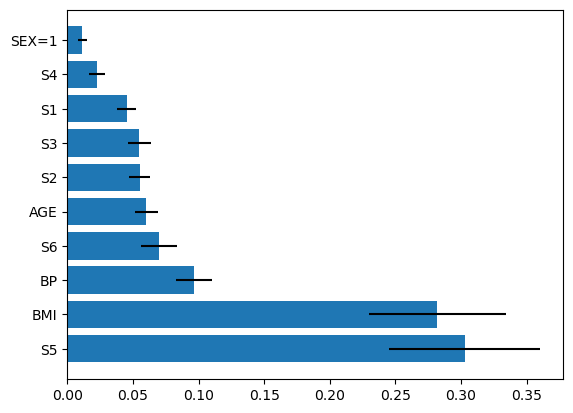

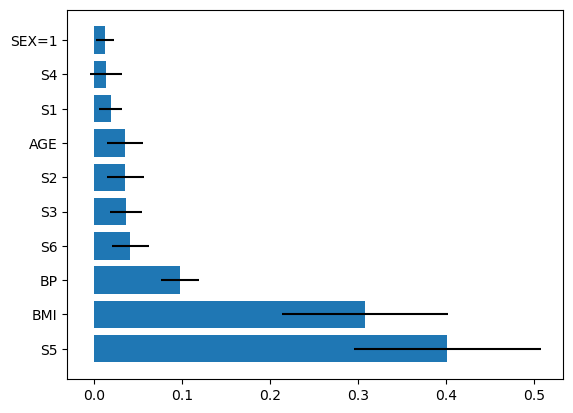

In [21]:
# random forest
plt.figure()
rf_ = pd.DataFrame(importances_rf)
sorted_means = rf_.mean(axis=0).sort_values(ascending=False)
rf_ = rf_[sorted_means.index]
plt.barh(y=range(rf_.shape[1]), width=rf_.mean(axis=0), xerr=2 * rf_.std(axis=0), tick_label=sorted_means.index)

# GBT
plt.figure()
gbt_ = pd.DataFrame(importances_gbt)
sorted_means = gbt_.mean(axis=0).sort_values(ascending=False)
gbt_ = gbt_[sorted_means.index]
plt.barh(y=range(gbt_.shape[1]), width=gbt_.mean(axis=0), xerr=2 * gbt_.std(axis=0), tick_label=sorted_means.index)